In [1]:
import numpy as np
import os
import pandas as pd

from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
from sklearn.metrics import confusion_matrix, classification_report

from Siamese_model import SiameseTrainer

from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau


c:\Users\mathi\anaconda3\envs\tensorflow_new\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
def load_and_preprocess_image(path, target_size=(96, 96)):
    '''Load an image from disk and preprocess it for the model'''
    img = load_img(path, target_size=target_size, color_mode='grayscale', interpolation='lanczos')
    img = img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img /= 255.0  # Normalize to [0,1]
    return img

def load_pairs_and_labels(csv_path, image_base_path):
    '''Load image pairs and their labels from a CSV file and the corresponding images on disk.'''
    df = pd.read_csv(csv_path)
    pair_images = []
    labels = df['label'].values
    
    for idx, row in df.iterrows():
        img1_path = os.path.join(image_base_path, row['image_1'])
        img2_path = os.path.join(image_base_path, row['image_2'])
        
        img1 = load_and_preprocess_image(img1_path)
        img2 = load_and_preprocess_image(img2_path)
        
        pair_images.append(np.concatenate([img1, img2], axis=0))
    
    # Convert list of pairs to a numpy array
    pairs = np.array(pair_images)
    
    # Since each image pair is concatenated along axis=0, we reshape to ensure
    # the final structure is compatible with what train_model expects
    pairs = pairs.reshape(-1, 2, *pairs.shape[2:])
    
    return pairs, labels


In [3]:
def new_model(input_shape, num_classes):
    '''Create a new model for training. This is a simple CNN with 4 convolutional layers, followed by 2 dense layers.'''
    model = Sequential([
        Conv2D(32, (3,3), activation='relu', input_shape=input_shape, kernel_regularizer=l2(0.001)),
        MaxPooling2D((2,2)),
        Dropout(0.25),
        Conv2D(64, (3,3), activation='relu'),
        MaxPooling2D((2,2)),
        Conv2D(128, (3,3), activation='relu'),
        MaxPooling2D((2,2)),
        Conv2D(256, (3,3), activation='relu'),
        MaxPooling2D((2,2)),
        Flatten(),
        Dense(1024, activation='relu'),
        Dense(128, activation='relu'),
        Dense(num_classes, activation='softmax')
    ])
    return model

In [4]:
input_shape = (96, 96, 1)
num_classes = 3

In [5]:
model_new = new_model(input_shape, num_classes)

In [6]:
# Define path for quater dataset
image_base_path = '../OpenSARShip/Categories/'

train_csv_path = os.getcwd() + "/Split_siamese/train_pairs.csv"
val_csv_path = os.getcwd() + "/Split_siamese/val_pairs.csv"
test_csv_path = os.getcwd() + "/Split_siamese/test_pairs.csv"

# Load and preprocess the data
print("Loading and preprocessing the data train")
train_pairs, train_labels = load_pairs_and_labels(train_csv_path, image_base_path)
print("Loading and preprocessing the data val")
val_pairs, val_labels = load_pairs_and_labels(val_csv_path, image_base_path)
print("Loading and preprocessing the data test")
test_pairs, test_labels = load_pairs_and_labels(test_csv_path, image_base_path)

Loading and preprocessing the data train
Loading and preprocessing the data val
Loading and preprocessing the data test


Creating the SiameseTrainer
Compiling the model
Training the model
Epoch 1/20
1544/1544 [==============================] - ETA: 0s - loss: 0.6372 - accuracy: 0.6006
Epoch 1: val_accuracy improved from -inf to 0.53920, saving model to Siam_batch128_quater_data_interpol_ter_whole_data_bis.pth
INFO:tensorflow:Assets written to: Siam_batch128_quater_data_interpol_ter_whole_data_bis.pth\assets


INFO:tensorflow:Assets written to: Siam_batch128_quater_data_interpol_ter_whole_data_bis.pth\assets


1544/1544 [==============================] - 1272s 822ms/step - loss: 0.6372 - accuracy: 0.6006 - val_loss: 0.6626 - val_accuracy: 0.5392 - lr: 1.0000e-04
Epoch 2/20
1544/1544 [==============================] - ETA: 0s - loss: 0.5657 - accuracy: 0.6006
Epoch 2: val_accuracy did not improve from 0.53920
1544/1544 [==============================] - 1247s 808ms/step - loss: 0.5657 - accuracy: 0.6006 - val_loss: 0.6593 - val_accuracy: 0.5392 - lr: 1.0000e-04
Epoch 3/20
1544/1544 [==============================] - ETA: 0s - loss: 0.5299 - accuracy: 0.6500
Epoch 3: val_accuracy improved from 0.53920 to 0.64256, saving model to Siam_batch128_quater_data_interpol_ter_whole_data_bis.pth
INFO:tensorflow:Assets written to: Siam_batch128_quater_data_interpol_ter_whole_data_bis.pth\assets


INFO:tensorflow:Assets written to: Siam_batch128_quater_data_interpol_ter_whole_data_bis.pth\assets


1544/1544 [==============================] - 1256s 814ms/step - loss: 0.5299 - accuracy: 0.6500 - val_loss: 0.6664 - val_accuracy: 0.6426 - lr: 1.0000e-04
Epoch 4/20
1544/1544 [==============================] - ETA: 0s - loss: 0.5060 - accuracy: 0.8484
Epoch 4: val_accuracy did not improve from 0.64256
1544/1544 [==============================] - 1250s 810ms/step - loss: 0.5060 - accuracy: 0.8484 - val_loss: 0.6703 - val_accuracy: 0.6199 - lr: 1.0000e-04
Epoch 5/20
1544/1544 [==============================] - ETA: 0s - loss: 0.4837 - accuracy: 0.8517
Epoch 5: val_accuracy improved from 0.64256 to 0.65922, saving model to Siam_batch128_quater_data_interpol_ter_whole_data_bis.pth
INFO:tensorflow:Assets written to: Siam_batch128_quater_data_interpol_ter_whole_data_bis.pth\assets


INFO:tensorflow:Assets written to: Siam_batch128_quater_data_interpol_ter_whole_data_bis.pth\assets


1544/1544 [==============================] - 1251s 810ms/step - loss: 0.4837 - accuracy: 0.8517 - val_loss: 0.6444 - val_accuracy: 0.6592 - lr: 1.0000e-04
Epoch 6/20
1544/1544 [==============================] - ETA: 0s - loss: 0.4649 - accuracy: 0.8522
Epoch 6: val_accuracy did not improve from 0.65922
1544/1544 [==============================] - 1248s 808ms/step - loss: 0.4649 - accuracy: 0.8522 - val_loss: 0.6587 - val_accuracy: 0.6394 - lr: 1.0000e-04
Epoch 7/20
1544/1544 [==============================] - ETA: 0s - loss: 0.4481 - accuracy: 0.8530
Epoch 7: val_accuracy improved from 0.65922 to 0.66897, saving model to Siam_batch128_quater_data_interpol_ter_whole_data_bis.pth
INFO:tensorflow:Assets written to: Siam_batch128_quater_data_interpol_ter_whole_data_bis.pth\assets


INFO:tensorflow:Assets written to: Siam_batch128_quater_data_interpol_ter_whole_data_bis.pth\assets


1544/1544 [==============================] - 1249s 809ms/step - loss: 0.4481 - accuracy: 0.8530 - val_loss: 0.6545 - val_accuracy: 0.6690 - lr: 1.0000e-04
Epoch 8/20
1544/1544 [==============================] - ETA: 0s - loss: 0.4250 - accuracy: 0.8620
Epoch 8: val_accuracy did not improve from 0.66897

Epoch 8: ReduceLROnPlateau reducing learning rate to 1.9999999494757503e-05.
1544/1544 [==============================] - 1242s 805ms/step - loss: 0.4250 - accuracy: 0.8620 - val_loss: 0.6804 - val_accuracy: 0.6383 - lr: 1.0000e-04
Epoch 9/20
1544/1544 [==============================] - ETA: 0s - loss: 0.4158 - accuracy: 0.8626
Epoch 9: val_accuracy did not improve from 0.66897
1544/1544 [==============================] - 1248s 808ms/step - loss: 0.4158 - accuracy: 0.8626 - val_loss: 0.6802 - val_accuracy: 0.6471 - lr: 2.0000e-05
Epoch 10/20
1544/1544 [==============================] - ETA: 0s - loss: 0.4130 - accuracy: 0.8627
Epoch 10: val_accuracy did not improve from 0.66897
1544/154

INFO:tensorflow:Assets written to: Siam_batch128_quater_data_interpol_ter_whole_data_bis.pth\assets


New best model with validation accuracy 0.6481155753135681 saved as Siam_batch128_quater_data_interpol_ter_whole_data_bis.pth
Plotting the training history


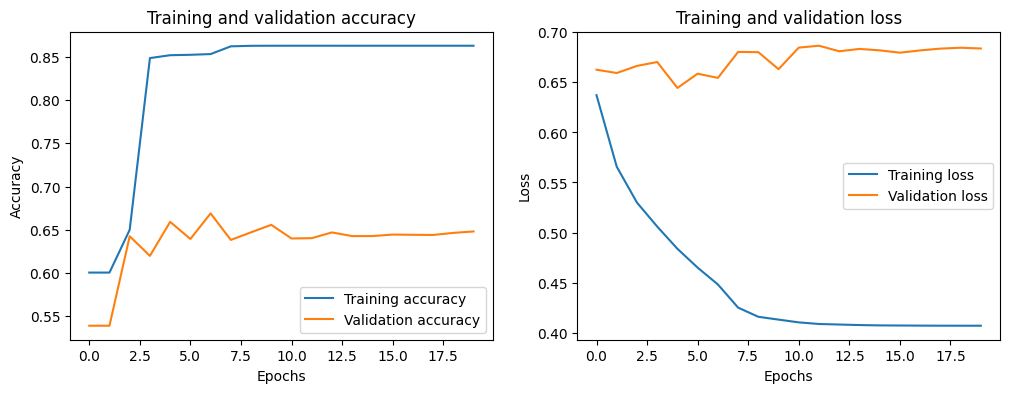

Evaluating the model
686/686 [==============================] - 35s 51ms/step - loss: 0.7273 - accuracy: 0.6063
Test accuracy:  0.6063340306282043


In [7]:
print("Creating the SiameseTrainer")
siamese_network = SiameseTrainer(base_model_func=new_model, input_shape=(96, 96, 1), num_classes=num_classes)
# siamese_network = SiameseTrainer(base_model_func=new_model, input_shape=(96, 96, 1), num_classes=num_classes)

# Set the optimizer
initial_learning_rate = 0.0001
# lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
#     initial_learning_rate,
#     decay_steps=1000,
#     decay_rate=0.96,
#     staircase=True)

optimizer = Adam(learning_rate=initial_learning_rate)

# Compile the model
print("Compiling the model")
# siamese_network.compile_model(optimizer='adam', loss='binary_crossentropy')
siamese_network.compile_model(optimizer=optimizer, loss='binary_crossentropy')

# early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode = 'min', restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, verbose=1, mode = 'min')

# Train the model
print("Training the model")
# siamese_network.train_model(train_pairs, train_labels, val_pairs, val_labels, epochs=10, batch_size=32)
siamese_network.train_model(train_pairs, train_labels, val_pairs, val_labels, epochs=20, batch_size=128, model_save_name='Siam_batch128_quater_data_interpol_ter_whole_data_bis.pth',
                            callbacks=[reduce_lr])


# Plot training history
print("Plotting the training history")
siamese_network.plot_training()

# Evaluate the model
print("Evaluating the model")
siamese_network.evaluate_model(test_pairs, test_labels)


In [8]:
# print(os.getcwd())
# print(os.path.join(os.getcwd(), '../OpenSARShip/Categories/'))
base_dir = os.path.abspath('../OpenSARShip/Categories/')
print(base_dir)

c:\Users\mathi\Julia\Projet_3A\OpenSARShip\Categories


In [9]:
def get_category_from_path(file_path):
    '''Extract the category from a file path. The category is assumed to be the first component of the path, separated by a forward slash.'''
    category = file_path.split('\\')[0]
    return category


In [10]:
# Reference of the images
# image_base_path = '../OpenSARShip/Categories/'
image_base_path = os.path.abspath('../OpenSARShip/Categories/')

reference_images = {
    'Tanker' : [load_and_preprocess_image(image_base_path + '/Tanker/Tanker_Visual_Cargo_x6945_y4168_vv.tif'),
                load_and_preprocess_image(image_base_path + '/Tanker/Tanker_Visual_Cargo_x52546_y8377_vv.tif')],
    'Container Ship' : [load_and_preprocess_image(image_base_path + '/Container Ship/ContainerShip_Visual_Cargo_x186_y2504_vv.tif'),
                        load_and_preprocess_image(image_base_path + '/Container Ship/ContainerShip_Visual_Cargo_x215_y7247_vv.tif')],
    'Bulk Carrier' : [load_and_preprocess_image(image_base_path + '/Bulk Carrier/BulkCarrier_Visual_Cargo_x48_y7700_vv.tif'),
                      load_and_preprocess_image(image_base_path + '/Bulk Carrier/BulkCarrier_Visual_Cargo_x123_y5601_vv.tif')]
}

In [11]:
def classify_test_image(test_image, siamese_model, reference_images):
    '''Classify a test image using a trained Siamese model and a set of reference images. 
    The reference images are assumed to be preprocessed and stored in a dictionary, 
    where the keys are the categories and the values are lists of images. 
    The test image is also assumed to be preprocessed. 
    The function returns the predicted category.'''
    highest_similarity = 0
    predicted_category = None
    
    for category, refs in reference_images.items():
        category_similarity = 0
        
        for ref_img in refs:
            # Ensure both test_image and ref_img are 4-dimensional
            # (1, Height, Width, Channels)
            similarity = siamese_model.predict([test_image, ref_img])[0][0]
            category_similarity += similarity
        
        # Calculate average similarity for this category
        category_similarity /= len(reference_images[category])
        
        if category_similarity > highest_similarity:
            highest_similarity = category_similarity
            predicted_category = category
            
    return predicted_category



In [12]:
test_df = pd.read_csv(os.path.join(os.getcwd(), 'Split_quater_siamese/test_pairs.csv'))


predictions = []
true_categories = []

for index, row in test_df.iterrows():
    # img1_path = os.path.join('OpenSARShip/Categories', row['image_1'])
    img1_path = os.path.join(os.path.abspath('../OpenSARShip/Categories'), row['image_1'])
    img1_category = get_category_from_path(row['image_1'])
    img1 = load_and_preprocess_image(img1_path)
    
    predicted_category = classify_test_image(img1, siamese_network.model, reference_images)
    
    predictions.append(predicted_category)
    true_categories.append(img1_category)



1/1 [==============================] - 0s 235ms/step


1/1 [==============================] - 0s 33ms/step


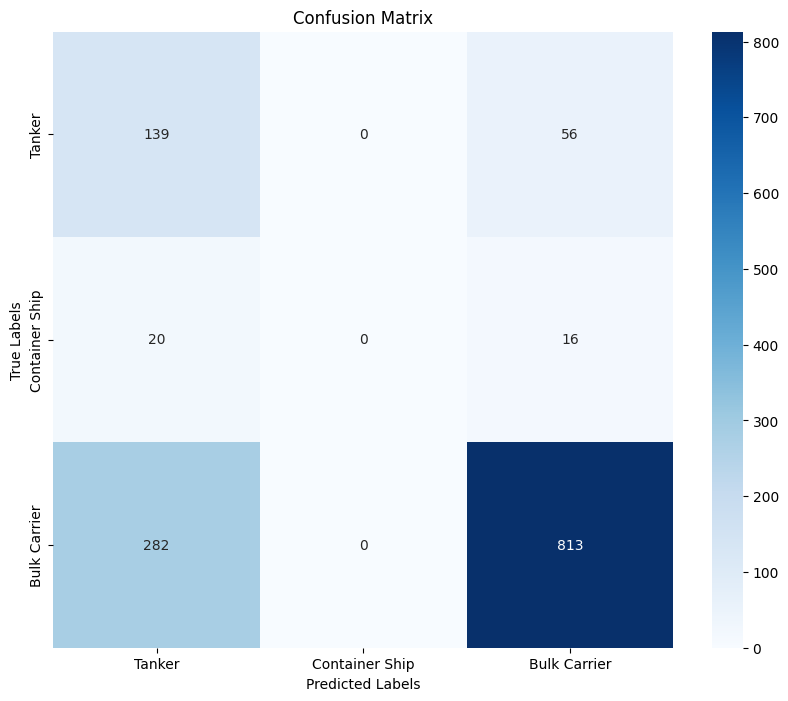

In [13]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt


conf_matrix = confusion_matrix(true_categories, predictions, labels=list(reference_images.keys()))
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=list(reference_images.keys()), yticklabels=list(reference_images.keys()))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


In [14]:
print(classification_report(true_categories, predictions, target_names=list(reference_images.keys())))


                precision    recall  f1-score   support

        Tanker       0.92      0.74      0.82      1095
Container Ship       0.00      0.00      0.00        36
  Bulk Carrier       0.32      0.71      0.44       195

      accuracy                           0.72      1326
     macro avg       0.41      0.49      0.42      1326
  weighted avg       0.80      0.72      0.74      1326



c:\Users\mathi\anaconda3\envs\tensorflow_new\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\mathi\anaconda3\envs\tensorflow_new\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\mathi\anaconda3\envs\tensorflow_new\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(resu

In [15]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(true_categories, predictions)
print(f"Overall accuracy: {accuracy*100:.2f}%")

Overall accuracy: 71.79%


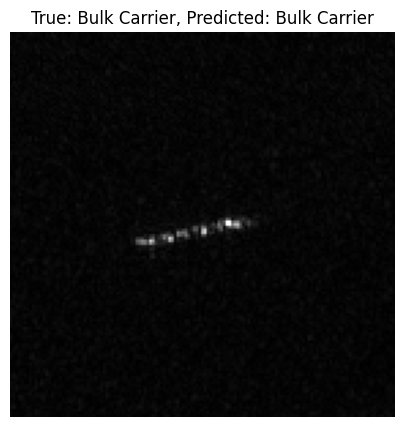

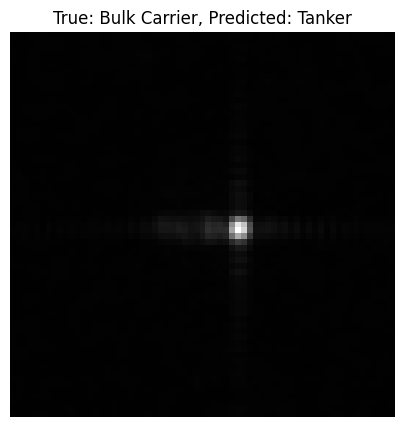

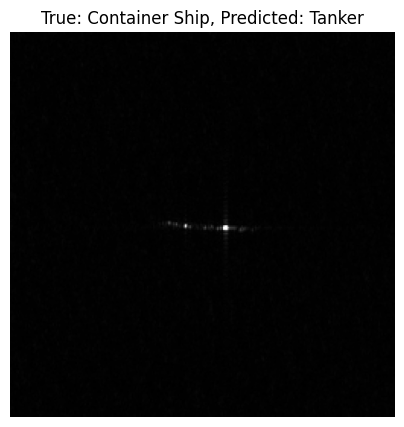

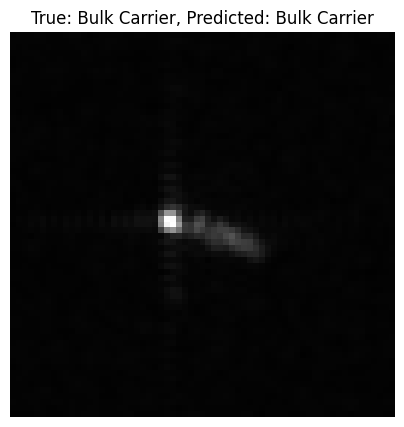

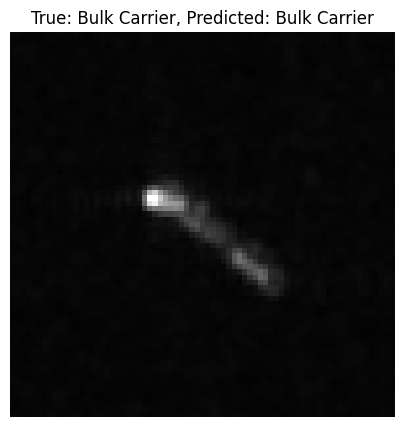

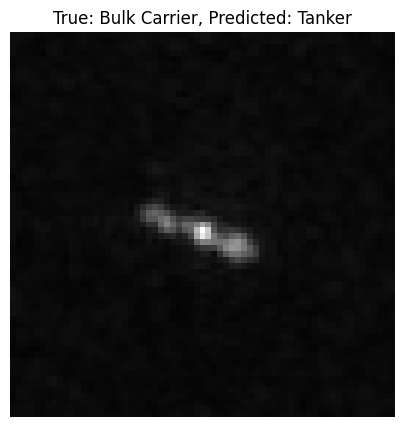

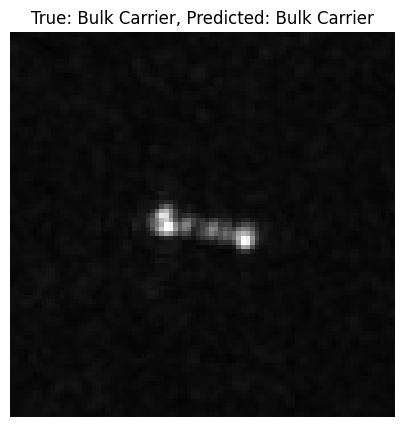

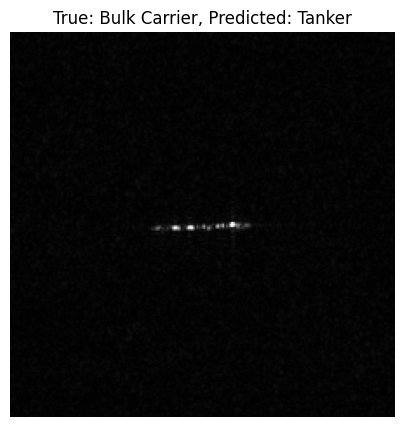

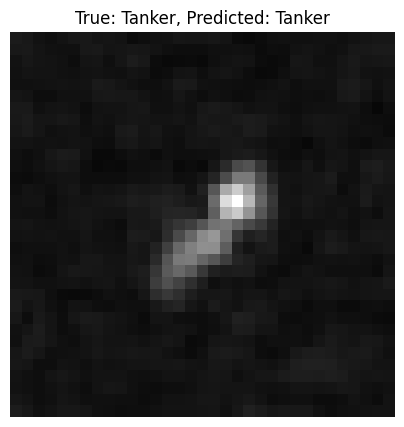

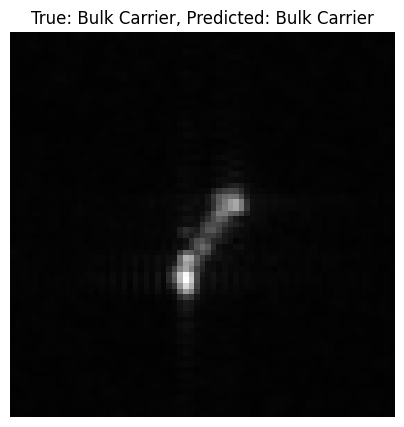

In [16]:
import random
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img

# Randomly select a few images
samples = random.sample(range(len(predictions)), 10)

for i in samples:
    img_path = os.path.join(image_base_path, test_df.iloc[i]['image_1'])
    img = load_img(img_path)
    true_label = true_categories[i]
    predicted_label = predictions[i]
    
    plt.figure(figsize=(5, 5))
    plt.imshow(img, cmap='gray')
    plt.title(f'True: {true_label}, Predicted: {predicted_label}')
    plt.axis('off')
    plt.show()


In [17]:
from collections import Counter

prediction_counts = Counter(predictions)
print(prediction_counts)


Counter({'Bulk Carrier': 885, 'Tanker': 441})


In [18]:
test_df = pd.read_csv(os.path.join(os.getcwd(), 'Split_Tanker_Bulk_Container_frugal_vv/test.csv'))
predictions = []
true_categories = []

for index, row in test_df.iterrows():
    # img1_path = os.path.join('OpenSARShip/Categories', row['image_1'])
    img1_path = os.path.join(os.path.abspath('../OpenSARShip/Categories'), row['file_path'])
    img1_category = get_category_from_path(row['file_path'])
    img1 = load_and_preprocess_image(img1_path)
    
    predicted_category = classify_test_image(img1, siamese_network.model, reference_images)
    
    predictions.append(predicted_category)
    true_categories.append(img1_category)

1/1 [==============================] - 0s 30ms/step


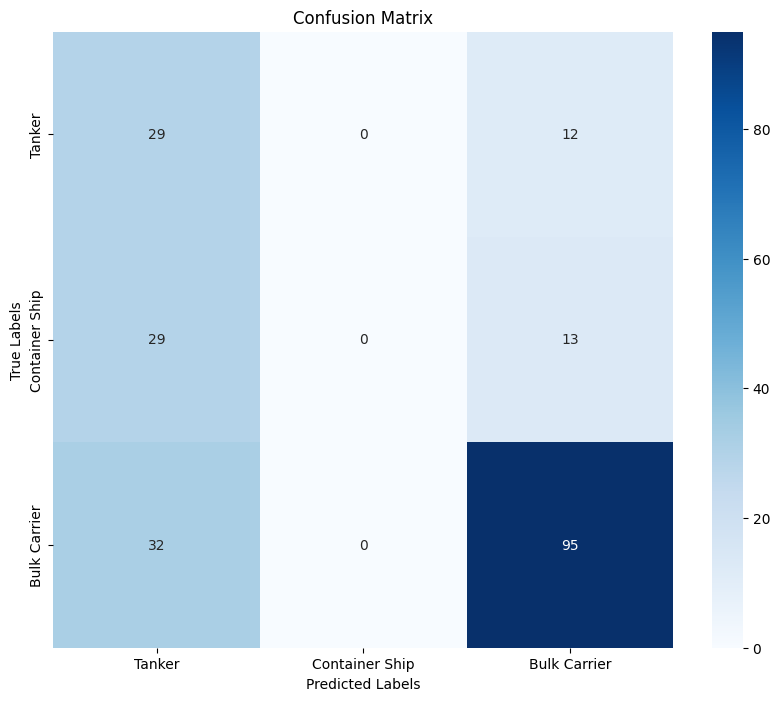

In [19]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt


conf_matrix = confusion_matrix(true_categories, predictions, labels=list(reference_images.keys()))
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=list(reference_images.keys()), yticklabels=list(reference_images.keys()))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [20]:
print(classification_report(true_categories, predictions, target_names=list(reference_images.keys())))

                precision    recall  f1-score   support

        Tanker       0.79      0.75      0.77       127
Container Ship       0.00      0.00      0.00        42
  Bulk Carrier       0.32      0.71      0.44        41

      accuracy                           0.59       210
     macro avg       0.37      0.49      0.40       210
  weighted avg       0.54      0.59      0.55       210



c:\Users\mathi\anaconda3\envs\tensorflow_new\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\mathi\anaconda3\envs\tensorflow_new\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\mathi\anaconda3\envs\tensorflow_new\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(resu

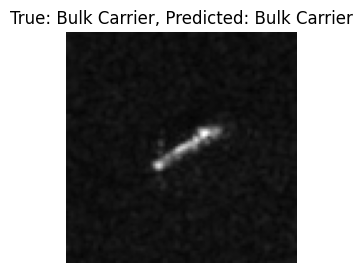

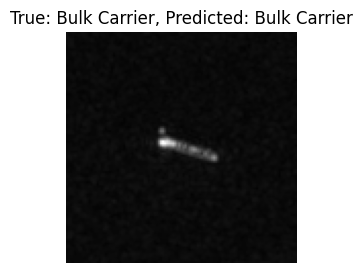

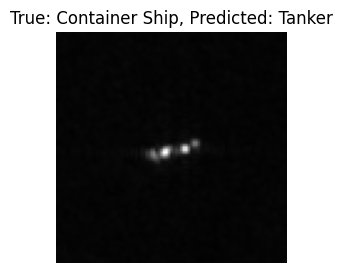

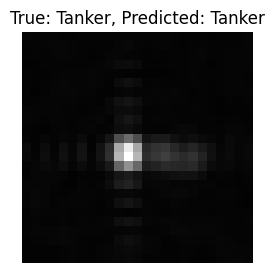

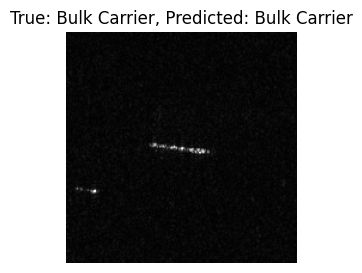

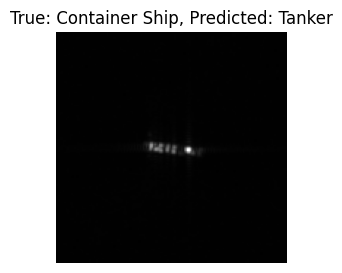

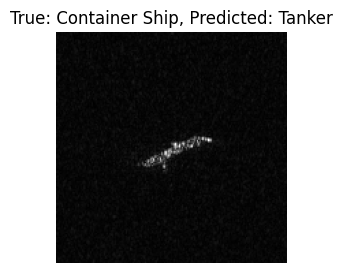

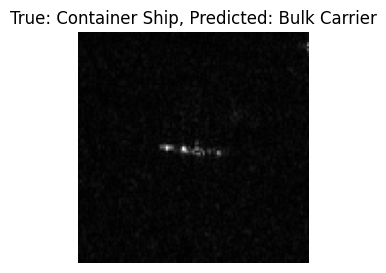

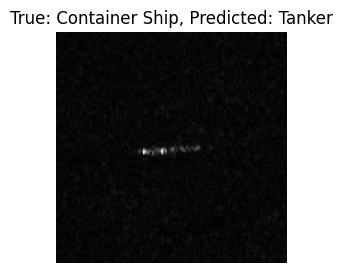

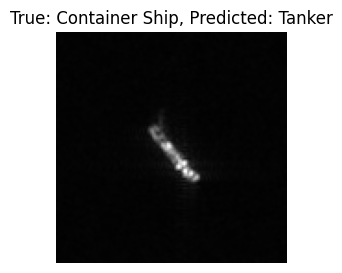

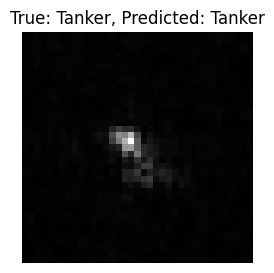

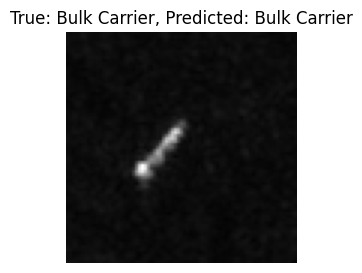

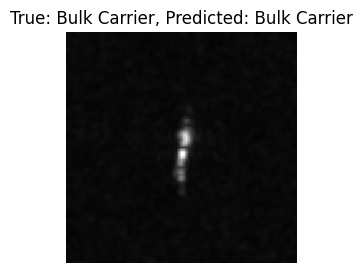

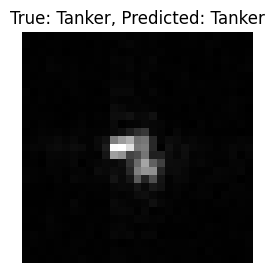

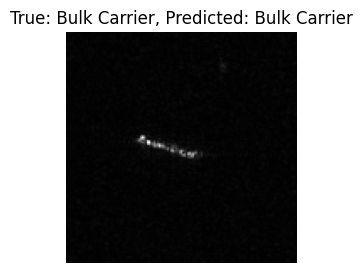

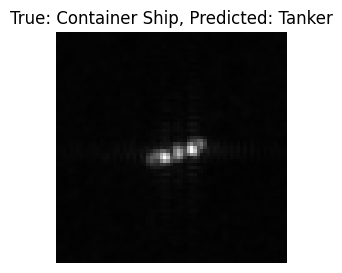

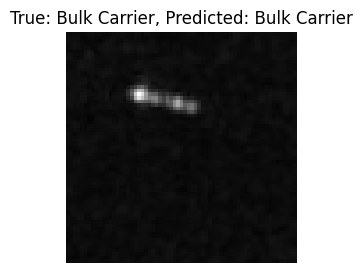

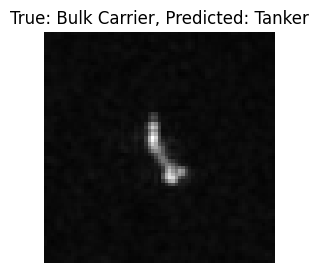

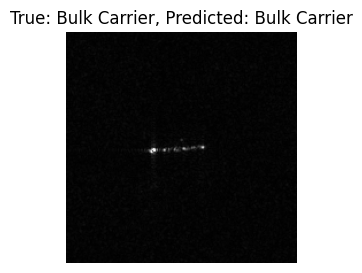

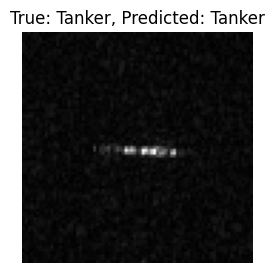

In [21]:
import random
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img

# Randomly select a few images
samples = random.sample(range(len(predictions)), 20)

for i in samples:
    img_path = os.path.join(image_base_path, test_df.iloc[i]['file_path'])
    img = load_img(img_path)
    true_label = true_categories[i]
    predicted_label = predictions[i]
    
    plt.figure(figsize=(3, 3))
    plt.imshow(img, cmap='gray')
    plt.title(f'True: {true_label}, Predicted: {predicted_label}')
    plt.axis('off')
    plt.show()

In [22]:
from collections import Counter

prediction_counts = Counter(predictions)
print(prediction_counts)

Counter({'Bulk Carrier': 120, 'Tanker': 90})


In [23]:
reference_images = {
    'Tanker' : [load_and_preprocess_image(image_base_path + '/Tanker/Tanker_Visual_Cargo_x6945_y4168_vv.tif'),
                load_and_preprocess_image(image_base_path + '/Tanker/Tanker_Visual_Other Type_x13748_y5746_vv.tif')],
    'Container Ship' : [load_and_preprocess_image(image_base_path + '/Container Ship/ContainerShip_Visual_Cargo_x186_y2504_vv.tif'),
                        load_and_preprocess_image(image_base_path + '/Container Ship/ContainerShip_Visual_Cargo_x215_y7247_vv.tif')],
    'Bulk Carrier' : [load_and_preprocess_image(image_base_path + '/Bulk Carrier/BulkCarrier_Visual_Cargo_x48_y7700_vv.tif'),
                      load_and_preprocess_image(image_base_path + '/Bulk Carrier/BulkCarrier_Visual_Cargo_x125_y7052_vv.tif')]}

In [24]:
test_df = pd.read_csv(os.path.join(os.getcwd(), 'Split_Tanker_Bulk_Container_frugal_vv/test.csv'))


predictions = []
true_categories = []

for index, row in test_df.iterrows():
    # img1_path = os.path.join('OpenSARShip/Categories', row['image_1'])
    img1_path = os.path.join(os.path.abspath('../OpenSARShip/Categories'), row['file_path'])
    img1_category = get_category_from_path(row['file_path'])
    img1 = load_and_preprocess_image(img1_path)
    
    predicted_category = classify_test_image(img1, siamese_network.model, reference_images)
    
    predictions.append(predicted_category)
    true_categories.append(img1_category)

1/1 [==============================] - 0s 31ms/step


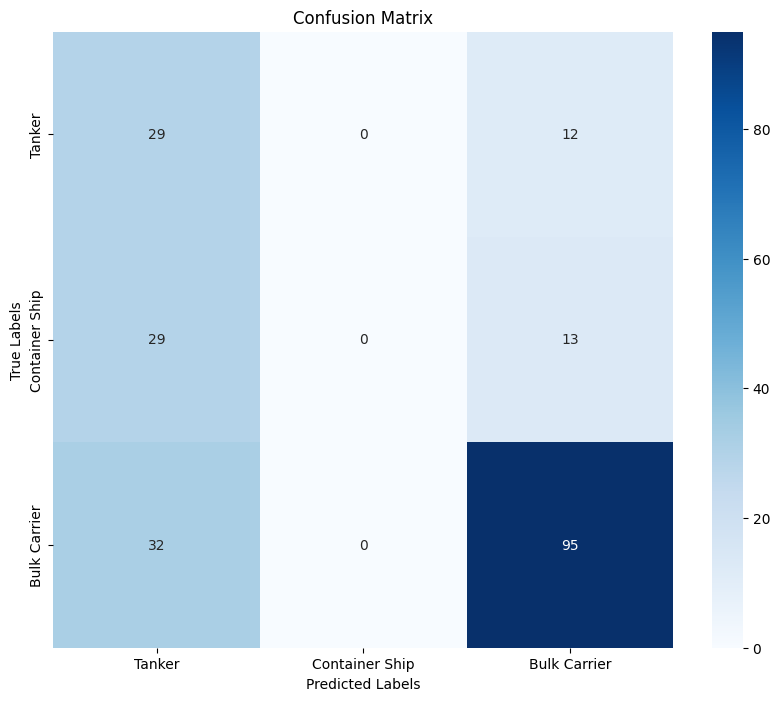

In [25]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(true_categories, predictions, labels=list(reference_images.keys()))
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=list(reference_images.keys()), yticklabels=list(reference_images.keys()))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [26]:
print(classification_report(true_categories, predictions, target_names=list(reference_images.keys())))
accuracy = accuracy_score(true_categories, predictions)
print(f"Overall accuracy: {accuracy*100:.2f}%")

                precision    recall  f1-score   support

        Tanker       0.79      0.75      0.77       127
Container Ship       0.00      0.00      0.00        42
  Bulk Carrier       0.32      0.71      0.44        41

      accuracy                           0.59       210
     macro avg       0.37      0.49      0.40       210
  weighted avg       0.54      0.59      0.55       210

Overall accuracy: 59.05%


c:\Users\mathi\anaconda3\envs\tensorflow_new\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\mathi\anaconda3\envs\tensorflow_new\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\mathi\anaconda3\envs\tensorflow_new\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(resu

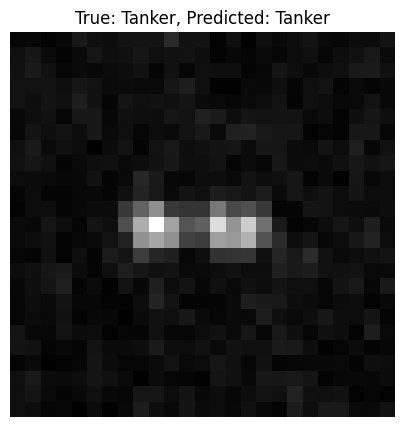

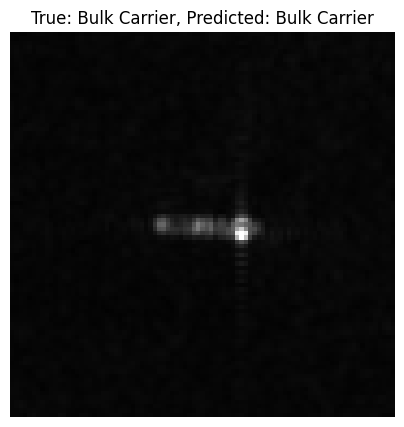

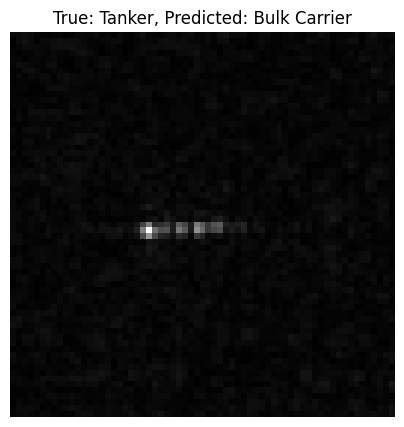

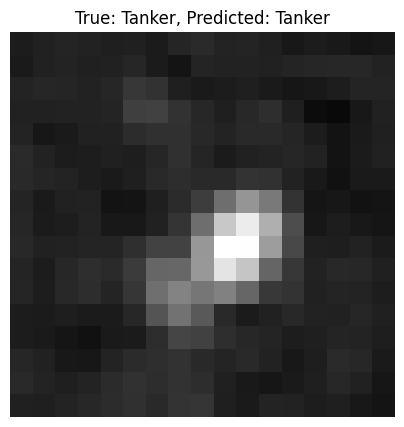

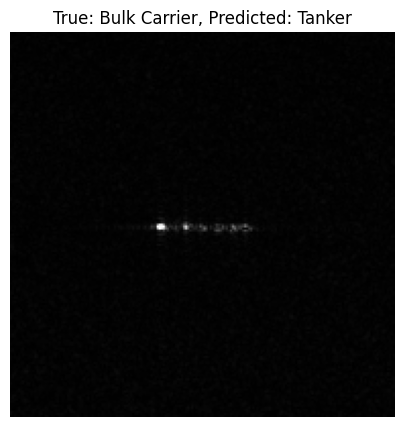

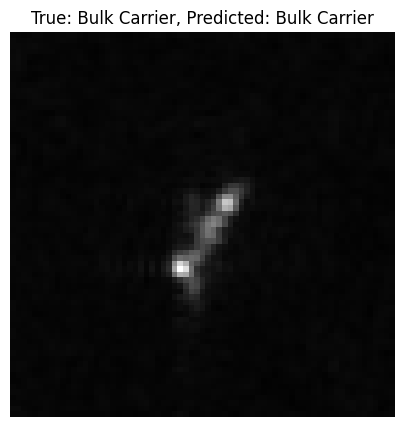

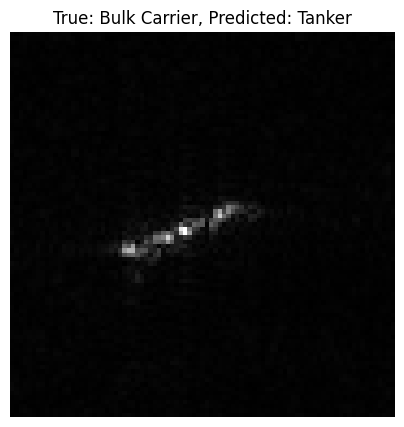

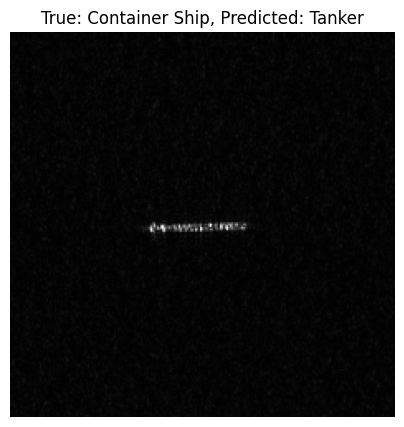

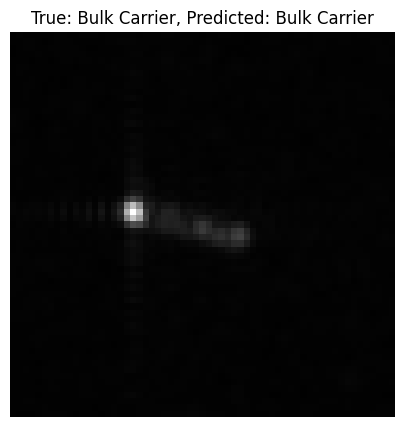

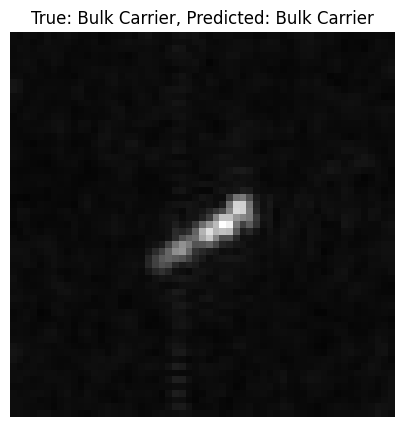

In [27]:
# Randomly select a few images
samples = random.sample(range(len(predictions)), 10)

for i in samples:
    img_path = os.path.join(image_base_path, test_df.iloc[i]['file_path'])
    img = load_img(img_path)
    true_label = true_categories[i]
    predicted_label = predictions[i]
    
    plt.figure(figsize=(5, 5))
    plt.imshow(img, cmap='gray')
    plt.title(f'True: {true_label}, Predicted: {predicted_label}')
    plt.axis('off')
    plt.show()